In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./kc_house_data.csv', encoding='windows-1251')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2. Изучите стоимости недвижимости

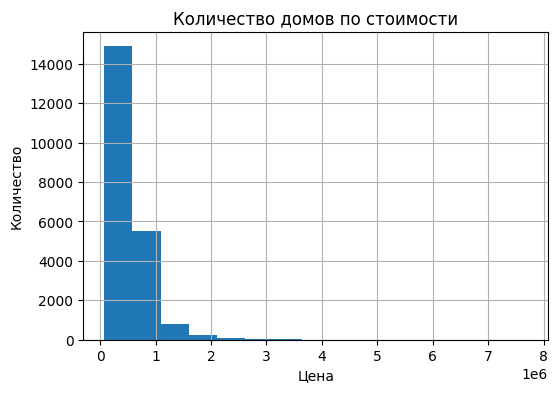

In [20]:
plt.figure(figsize=(6,4))
plt.hist(df['price'], bins=15)
plt.title('Количество домов по стоимости')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.grid();

Больше всего домов до 500000

1.3. Изучите распределение квадратуры жилой

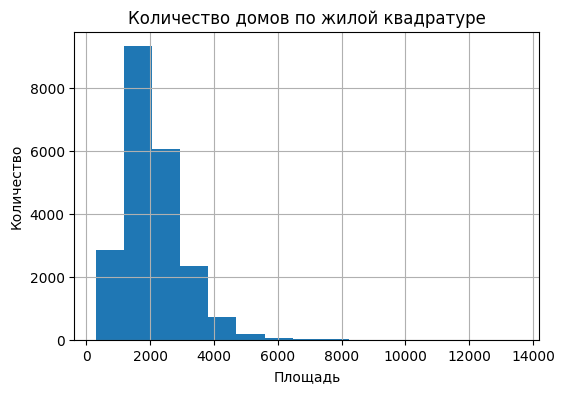

In [21]:
plt.figure(figsize=(6,4))
plt.hist(df['sqft_living'], bins=15)
plt.title('Количество домов по жилой квадратуре')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.grid();

Больше всего домов площадью до 2000

1.4. Изучите распределение года постройки

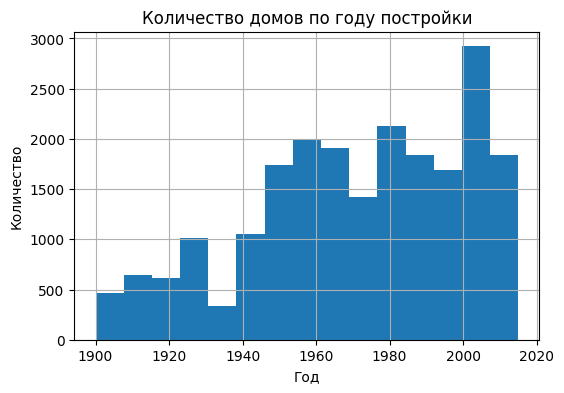

In [22]:
plt.figure(figsize=(6,4))
plt.hist(df['yr_built'], bins=15)
plt.title('Количество домов по году постройки')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.grid();

Больше всего домов построенно с 2000 по 2010

2.1. Изучите распределение домов от наличия вида на набережную

In [28]:
data = df['waterfront'].value_counts()
data.index=['No', 'Yes']
data

No     21450
Yes      163
Name: count, dtype: int64

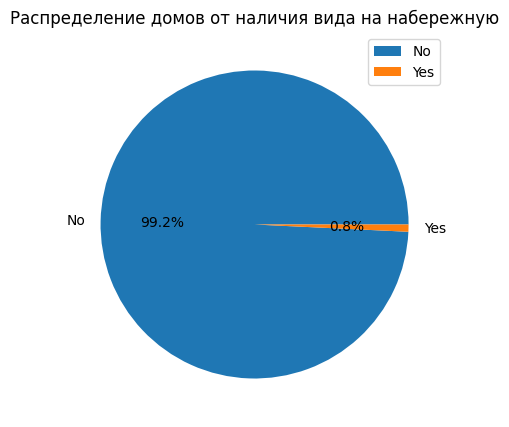

In [29]:
plt.figure(figsize=(7, 5))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(data.index);

Всего 0.8% домов имеют вид на набережную

2.2. Изучите распределение этажей домов

In [30]:
data = df['floors'].value_counts()
data

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

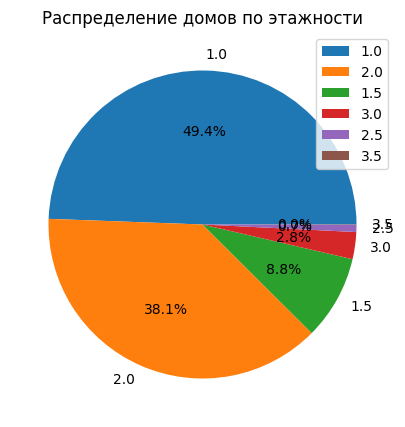

In [33]:
plt.figure(figsize=(7, 5))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Распределение домов по этажности')
plt.legend(data.index);

Больше всего одноэтажных домов

2.3. Изучите распределение состояния домов

In [34]:
data = df['condition'].value_counts()
data

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

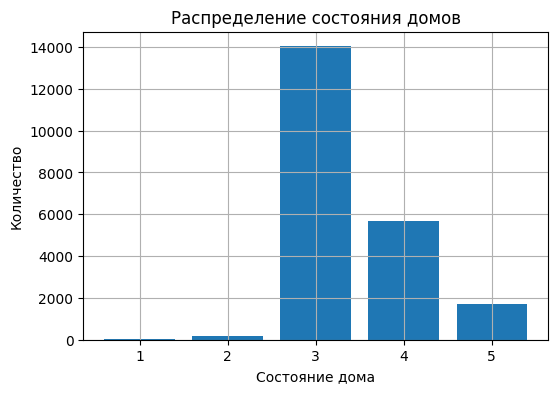

In [37]:
plt.figure(figsize=(6, 4))
plt.bar(data.index, data.values)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Количество')
plt.grid();

Больше всего домов с состоянием '3'

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [42]:
data = df.groupby('price')['bedrooms'].sum().reset_index()
data.head()

,price,bedrooms
0,75000.0,1
1,78000.0,2
2,80000.0,1
3,81000.0,2
4,82000.0,3


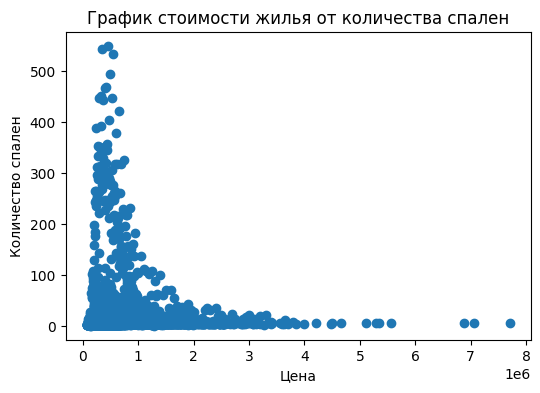

In [44]:
plt.figure(figsize=(6, 4))

plt.scatter(data['price'], data['bedrooms'])

plt.title('График стоимости жилья от количества спален')
plt.xlabel('Цена')
plt.ylabel('Количество спален');